In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
Households = read.csv('data/Households.csv.xz')

In [3]:
str(Households)
summary(Households)

'data.frame':	2500 obs. of  6 variables:
 $ NumVisits    : int  86 45 47 30 40 250 59 113 20 9 ...
 $ AvgProdCount : num  20.08 15.87 19.62 10.03 5.55 ...
 $ AvgDiscount  : num  8.11 7.44 14.37 3.85 2.96 ...
 $ AvgSalesValue: num  50.4 43.4 56.5 40 19.5 ...
 $ MorningPct   : num  46.51 8.89 14.89 13.33 2.5 ...
 $ AfternoonPct : num  51.2 60 76.6 56.7 67.5 ...


   NumVisits       AvgProdCount     AvgDiscount     AvgSalesValue    
 Min.   :   1.0   Min.   : 1.186   Min.   : 0.089   Min.   :  2.388  
 1st Qu.:  39.0   1st Qu.: 6.123   1st Qu.: 3.006   1st Qu.: 18.329  
 Median :  79.0   Median : 8.979   Median : 4.865   Median : 27.417  
 Mean   : 110.6   Mean   :10.291   Mean   : 5.713   Mean   : 31.621  
 3rd Qu.: 142.2   3rd Qu.:13.116   3rd Qu.: 7.327   3rd Qu.: 40.546  
 Max.   :1300.0   Max.   :56.600   Max.   :47.176   Max.   :165.829  
   MorningPct      AfternoonPct   
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.67   1st Qu.: 42.20  
 Median : 26.09   Median : 52.00  
 Mean   : 28.73   Mean   : 51.45  
 3rd Qu.: 37.17   3rd Qu.: 61.29  
 Max.   :100.00   Max.   :100.00  

In [6]:
head(Households)

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
1,86.000000,20.081395,8.105116,50.350698,46.511628,51.162791
2,45.000000,15.866667,7.444222,43.429778,8.888889,60.000000
3,47.00000,19.61702,14.36511,56.45128,14.89362,76.59574
4,30.00000,10.03333,3.85500,40.00367,13.33333,56.66667
5,40.00000,5.55000,2.95825,19.47650,2.50000,67.50000
6,250.00000,7.16400,3.31336,23.98464,25.60000,61.20000


In [13]:
nrow(subset(Households, MorningPct >= 100.0))
nrow(subset(Households, AfternoonPct >= 100.0))


[1] 4

[1] 13

In [17]:
subset(Households, AvgSalesValue > 150)
subset(Households, AvgDiscount > 25)
nrow(subset(Households, NumVisits >= 300)) / nrow(Households)

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
973,84.000000,42.666667,18.498929,160.551429,3.571429,36.904762
1899,69.000000,46.927536,27.184058,163.431884,92.753623,7.246377
1900,56.00000,38.55357,15.64607,152.52036,66.07143,33.92857
2042,29.00000,37.82759,29.94897,165.82931,10.34483,72.41379


,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
60,8.00000,13.37500,27.04625,50.11750,25.00000,62.50000
248,57.00000,36.43860,35.05246,105.94754,28.07018,42.10526
1238,51.00000,35.03922,26.74765,91.73745,58.82353,35.29412
1315,5.000,56.600,26.760,129.072,20.000,60.000
1574,28.00000,42.10714,47.17607,129.14393,50.00000,46.42857
1899,69.000000,46.927536,27.184058,163.431884,92.753623,7.246377
2026,18.00000,22.27778,36.33611,65.64611,11.11111,22.22222
2042,29.00000,37.82759,29.94897,165.82931,10.34483,72.41379
2409,8.0000,47.2500,36.6900,113.3187,0.0000,87.5000
2435,46.00000,23.00000,25.21109,71.82283,28.26087,47.82609


[1] 0.0592

In [18]:
library(caret)
preproc = preProcess(Households)
HouseholdsNorm = predict(preproc, Households)

Loading required package: lattice


In [19]:
summary(HouseholdsNorm)

   NumVisits        AvgProdCount      AvgDiscount      AvgSalesValue    
 Min.   :-0.9475   Min.   :-1.5239   Min.   :-1.4010   Min.   :-1.5342  
 1st Qu.:-0.6190   1st Qu.:-0.6976   1st Qu.:-0.6743   1st Qu.:-0.6976  
 Median :-0.2731   Median :-0.2197   Median :-0.2112   Median :-0.2206  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2737   3rd Qu.: 0.4728   3rd Qu.: 0.4021   3rd Qu.: 0.4684  
 Max.   :10.2828   Max.   : 7.7500   Max.   :10.3293   Max.   : 7.0432  
   MorningPct       AfternoonPct     
 Min.   :-1.6779   Min.   :-3.22843  
 1st Qu.:-0.7047   1st Qu.:-0.58006  
 Median :-0.1546   Median : 0.03458  
 Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4926   3rd Qu.: 0.61755  
 Max.   : 4.1617   Max.   : 3.04658  

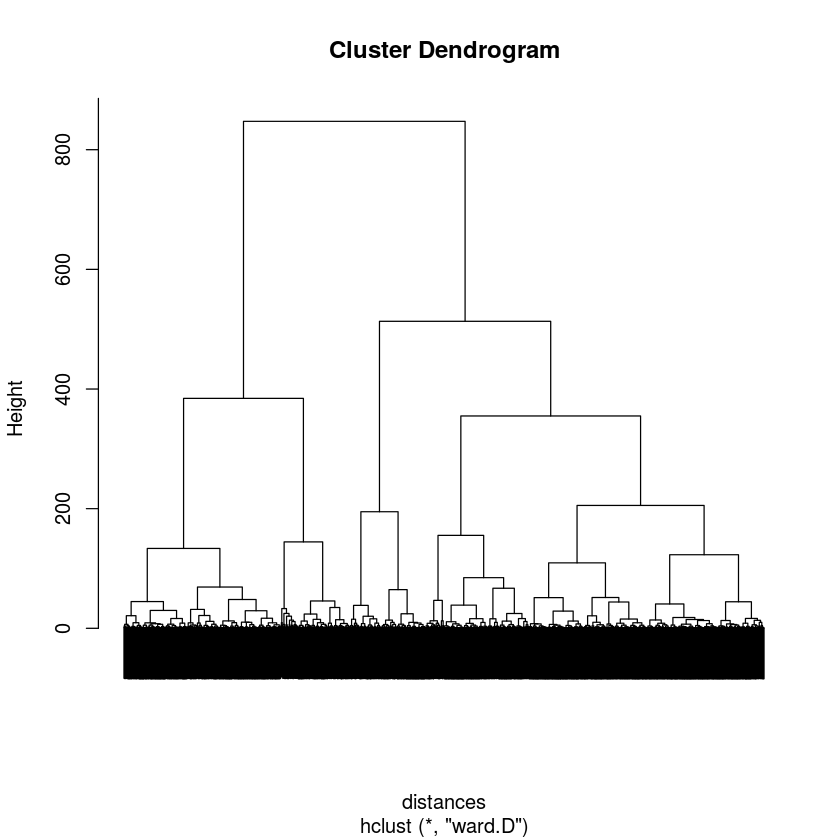

In [20]:
set.seed(200)
distances <- dist(HouseholdsNorm, method='euclidean')
ClusterShoppers <- hclust(distances, method='ward.D')
plot(ClusterShoppers, labels=F)

In [47]:
set.seed(200)
KMC = kmeans(HouseholdsNorm, centers = 10)
str(KMC)
summary(KMC)
table(KMC$cluster)

List of 9
 $ cluster     : int [1:2500] 7 3 1 3 5 6 1 1 3 8 ...
 $ centers     : num [1:10, 1:6] -0.248 -0.483 -0.234 -0.18 -0.246 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "1" "2" "3" "4" ...
  .. ..$ : chr [1:6] "NumVisits" "AvgProdCount" "AvgDiscount" "AvgSalesValue" ...
 $ totss       : num 14994
 $ withinss    : num [1:10] 628 449 700 282 580 ...
 $ tot.withinss: num 4828
 $ betweenss   : num 10166
 $ size        : int [1:10] 246 51 490 118 504 226 141 284 52 388
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


             Length Class  Mode   
cluster      2500   -none- numeric
centers        60   -none- numeric
totss           1   -none- numeric
withinss       10   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size           10   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric


  1   2   3   4   5   6   7   8   9  10 
246  51 490 118 504 226 141 284  52 388 

In [44]:
#subset(HouseholdsNorm, KMC$cluster == 1)
keys = seq(1, 10)
clusterSize = function(x) { c(x, nrow(subset(HouseholdsNorm, KMC$cluster == x))) }
#sizes = sapply(keys,  clusterSize)
data = do.call(rbind, lapply(keys, clusterSize))
colnames(data) = c('cluster', 'size')
data

cluster,size
1,246
2,51
3,490
4,118
5,504
6,226
7,141
8,284
9,52
10,388


In [64]:
KMC$centers
#head(subset(Households, KMC$cluster == 4), 10)

,NumVisits,AvgProdCount,AvgDiscount,AvgSalesValue,MorningPct,AfternoonPct
1,-0.2481149,1.4768542,1.2995075,1.4630282,-0.3484055,0.6582746
2,-0.4831678,3.7374075,3.4739658,3.5747198,0.1998456,-0.1276268
3,-0.23416257,0.29953633,0.29103420,0.30285030,-0.18244421,-0.01651476
4,-0.1798701,-0.5419201,-0.4572379,-0.5481618,2.4910609,-1.8112519
5,-0.2456230,-0.7355498,-0.6988240,-0.7400683,-0.5470039,0.2252972
6,1.480105440,-0.363857736,-0.352672495,-0.324038146,0.065276685,0.008440554
7,-0.09256621,0.86666142,0.90448250,0.98800423,1.44404053,-0.97966119
8,-0.26199562,-0.04997603,-0.10573215,-0.12033959,-0.89830632,1.41927237
9,4.4636731,-0.8514506,-0.7674102,-0.8051772,-0.2389930,-0.1704913
10,-0.3446394,-0.6379429,-0.5443075,-0.6261987,0.5047486,-0.7864421


In [66]:
set.seed(5000)
KMC5 = kmeans(HouseholdsNorm, centers = 5)
str(KMC5)
summary(KMC5)
table(KMC5$cluster)

List of 9
 $ cluster     : int [1:2500] 5 5 1 5 2 2 5 5 5 2 ...
 $ centers     : num [1:5, 1:6] -0.398 -0.193 -0.169 2.695 -0.176 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:6] "NumVisits" "AvgProdCount" "AvgDiscount" "AvgSalesValue" ...
 $ totss       : num 14994
 $ withinss    : num [1:5] 1264 1838 1336 754 1604
 $ tot.withinss: num 6795
 $ betweenss   : num 8199
 $ size        : int [1:5] 182 994 428 172 724
 $ iter        : int 7
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


             Length Class  Mode   
cluster      2500   -none- numeric
centers        30   -none- numeric
totss           1   -none- numeric
withinss        5   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            5   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric


  1   2   3   4   5 
182 994 428 172 724 

In [69]:
#KMC5$centers
Households$cluster = KMC5$cluster

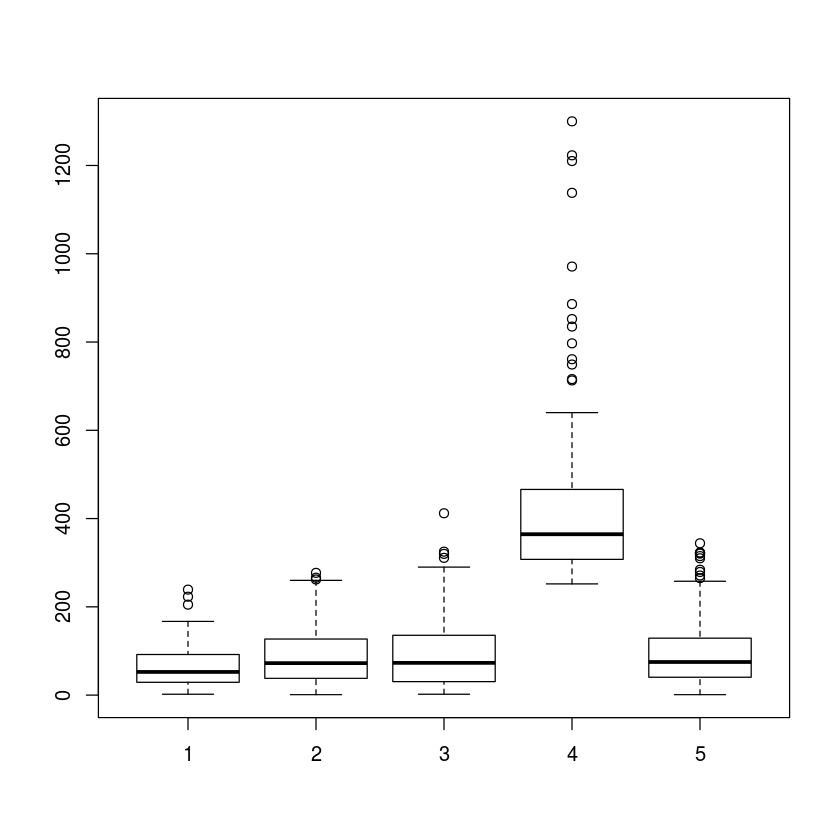

In [76]:
#Households
boxplot(Households$NumVisits ~ Households$cluster)

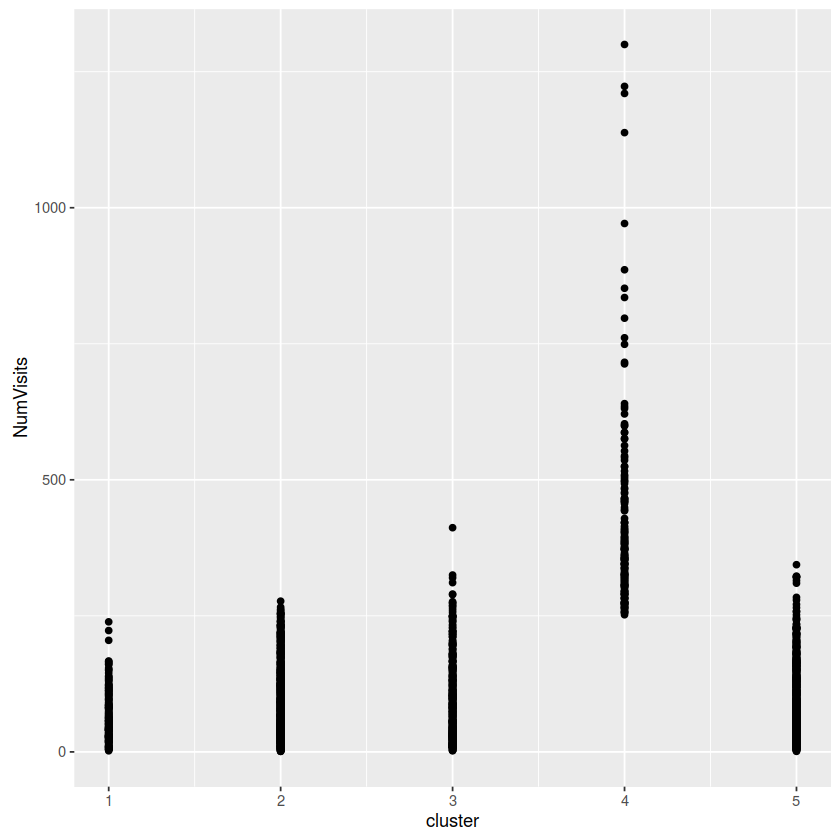

In [79]:
library(ggplot2)
ggplot(Households, aes(x=cluster, y=NumVisits)) + geom_point()